In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1 Load the dataset into python environment


In [2]:
df=pd.read_csv("titanic_dataset.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 2 Make "PassengerId as the index column

In [4]:
df1=pd.read_csv("titanic_dataset.csv",index_col="PassengerId")

In [5]:
df1

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# 3 Check basic details of the dataset

In [6]:
df1.shape

(891, 11)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df1.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df1.isna().sum()/df1.shape[0]*100

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

# 4 Fill the missing values present in the columns in the dataset

In [10]:
miss_colums_per=df1.isna().sum()/df1.shape[0]*100>50
miss_colums_per

Survived    False
Pclass      False
Name        False
Sex         False
Age         False
SibSp       False
Parch       False
Ticket      False
Fare        False
Cabin        True
Embarked    False
dtype: bool

In [11]:
# since the number of missing is much greater in cabin column ,it is dropped

In [12]:
missing_columns=df1.columns[miss_colums_per]

In [13]:
df2=df1.drop(missing_columns,axis=1)

In [14]:
df2.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [15]:
df2.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [16]:
#Filling the missing values

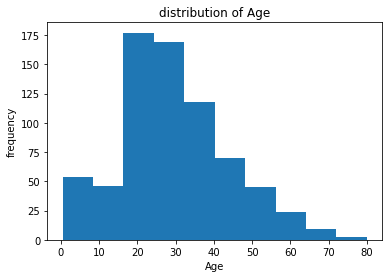

In [17]:
plt.hist(df2["Age"])
plt.title("distribution of Age")
plt.xlabel("Age")

plt.ylabel("frequency")
plt.show()

In [18]:
Age_median=df2["Age"].median()

In [19]:
df2["Age"]=df2["Age"].fillna(Age_median)

In [20]:
df2.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    2
dtype: int64

In [21]:
Embarked_mode=df2["Embarked"].mode()[0]

In [22]:
df2["Embarked"]=df2["Embarked"].fillna(Embarked_mode)

In [23]:

df2.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

# 5 check and handle outliers in atleast 3 columns in the dataset


In [24]:
df2.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
from scipy import stats

val = stats.zscore(df2['Fare'])
print(val)

PassengerId
1     -0.502445
2      0.786845
3     -0.488854
4      0.420730
5     -0.486337
         ...   
887   -0.386671
888   -0.044381
889   -0.176263
890   -0.044381
891   -0.492378
Name: Fare, Length: 891, dtype: float64


In [26]:
z_score = np.abs(stats.zscore(df2['Fare']))
print(z_score)

PassengerId
1      0.502445
2      0.786845
3      0.488854
4      0.420730
5      0.486337
         ...   
887    0.386671
888    0.044381
889    0.176263
890    0.044381
891    0.492378
Name: Fare, Length: 891, dtype: float64


In [27]:
exclude_indexes_fare = np.where(z_score >3)
print(exclude_indexes_fare)

(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779], dtype=int64),)


In [28]:
df3=df2.drop(exclude_indexes_fare[0])

In [29]:
df3

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S


In [30]:
Q1_age=df3.Age.quantile(0.25)
Q3_age=df3.Age.quantile(0.75)
Q1_age,Q3_age


(22.0, 35.0)

In [31]:
IQR_age=Q3_age-Q1_age
IQR_age

13.0

In [32]:
lower_limit_age=Q1_age-1.5*IQR_age
upper_limit_age=Q3_age+1.5*IQR_age
lower_limit_age,upper_limit_age

(2.5, 54.5)

In [33]:
df3[(df3.Age<lower_limit_age)|(df3.Age>upper_limit_age)]


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58.00,0,0,113783,26.5500,S
16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.00,0,0,248706,16.0000,S
17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,Q
34,0,2,"Wheadon, Mr. Edward H",male,66.00,0,0,C.A. 24579,10.5000,S
...,...,...,...,...,...,...,...,...,...,...
828,1,2,"Mallet, Master. Andre",male,1.00,0,2,S.C./PARIS 2079,37.0042,C
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.00,0,0,113572,80.0000,S
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,S


In [34]:
df4=df3[(df3.Age>lower_limit_age)&(df3.Age<upper_limit_age)]

In [35]:
Q1_SibSp=df4.SibSp.quantile(0.25)
Q3_SibSp=df4.SibSp.quantile(0.75)
Q1_age,Q3_age

(22.0, 35.0)

In [36]:
IQR_SibSp=Q3_SibSp-Q1_SibSp
IQR_SibSp

1.0

In [37]:
lower_limit_SibSp=Q1_SibSp-1.5*IQR_SibSp
upper_limit_SibSp=Q3_SibSp+1.5*IQR_SibSp
lower_limit_SibSp,upper_limit_SibSp

(-1.5, 2.5)

In [38]:
df4[(df4.SibSp<lower_limit_SibSp)|(df4.SibSp>upper_limit_SibSp)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S


In [39]:
df5=df4[(df4.SibSp>lower_limit_age)&(df4.SibSp<upper_limit_age)]

In [40]:
df5

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,S
51,0,3,"Panula, Master. Juha Niilo",male,7.0,4,1,3101295,39.6875,S
60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,S
64,0,3,"Skoog, Master. Harald",male,4.0,3,2,347088,27.9000,S
69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,S
72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9000,S
86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.0,3,0,3101278,15.8500,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,S


# 6 Do min max scaling on the features set(Take "surviver" as target )

In [43]:
df5.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.179487,2.820513,16.435897,4.461538,1.589744,55.426713
std,0.388776,0.555915,9.941394,1.789533,0.594623,63.050535
min,0.000000,1.000000,3.000000,3.000000,0.000000,7.925000
25%,0.000000,3.000000,8.000000,3.000000,1.000000,27.900000
50%,0.000000,3.000000,14.000000,4.000000,2.000000,31.387500
75%,0.000000,3.000000,28.000000,5.000000,2.000000,58.225000
max,1.000000,3.000000,33.000000,8.000000,2.000000,263.000000


In [45]:
df5.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [46]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39 entries, 25 to 864
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  39 non-null     int64  
 1   Pclass    39 non-null     int64  
 2   Name      39 non-null     object 
 3   Sex       39 non-null     object 
 4   Age       39 non-null     float64
 5   SibSp     39 non-null     int64  
 6   Parch     39 non-null     int64  
 7   Ticket    39 non-null     object 
 8   Fare      39 non-null     float64
 9   Embarked  39 non-null     object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.4+ KB


In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

#MinMaxScaler of  values
df6=df5
scaled_values=scaler.fit_transform(df6[['Pclass', 'Age', 'SibSp', 'Parch','Fare']])
scaled_values
scaled_df=pd.DataFrame(scaled_values,columns=['Pclass', 'Age', 'SibSp', 'Parch','Fare'])
scaled_df

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.166667,0.0,0.5,0.051553
1,0.0,0.533333,0.0,1.0,1.000000
2,1.0,0.133333,0.2,0.5,0.124522
3,1.0,0.266667,0.4,1.0,0.152798
4,1.0,0.033333,0.0,1.0,0.078310
5,1.0,0.466667,0.2,1.0,0.000000
6,1.0,0.433333,0.4,1.0,0.152798
7,1.0,1.000000,0.0,0.0,0.031069
8,0.0,0.666667,0.0,1.0,1.000000
9,1.0,0.833333,1.0,1.0,0.241596


In [48]:
scaled_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,0.910256,0.447863,0.292308,0.794872,0.186226
std,0.277958,0.331380,0.357907,0.297311,0.247184
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.166667,0.000000,0.500000,0.078310
50%,1.000000,0.366667,0.200000,1.000000,0.091983
75%,1.000000,0.833333,0.400000,1.000000,0.197197
max,1.000000,1.000000,1.000000,1.000000,1.000000
